In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [6]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['label'] = iris.target

In [7]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

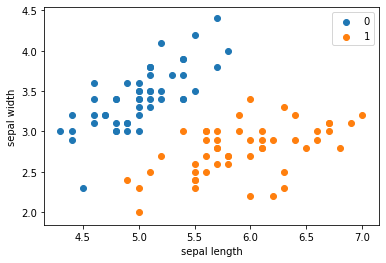

In [10]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label ='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [32]:
data = np.array(df.iloc[:100, [0, 1,-1]])
X, y = data[:,:-1],data[:,-1]
y = np.array([1 if i ==1 else -1 for i in y])

In [33]:
# 感知机
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0])-1, dtype = np.float32)
        self.b = 0
        self.l_rate = 0.1
        
    def sign(self, x, w,b):
        y = np.dot(x,w)+b
        return y
    
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b)<=0:
                    self.w = self.w + self.l_rate * np.dot(y,X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong  = True
        return 'Perceptron Model'
    def score(self):
        pass

In [34]:
perceptron = Model()
perceptron.fit(X,y)

'Perceptron Model'

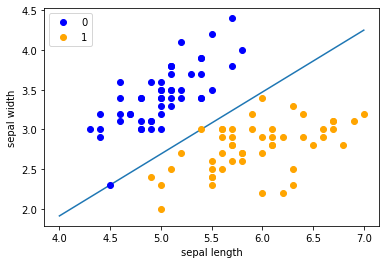

In [35]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b)/ perceptron.w[1]
plt.plot(x_points, y_)
plt.plot(data[:50, 0],data[:50,1], 'bo', color = 'blue', label = '0')
plt.plot(data[50:100,0],data[50:100,1],'bo',color = 'orange', label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [36]:
import sklearn
from sklearn.linear_model import Perceptron
sklearn.__version__

'0.21.2'

In [37]:
clf = Perceptron(fit_intercept = True, max_iter = 1000, shuffle = True)
clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
print(clf.coef_)

[[ 23.2 -38.7]]


In [39]:
print(clf.intercept_)

[-5.]


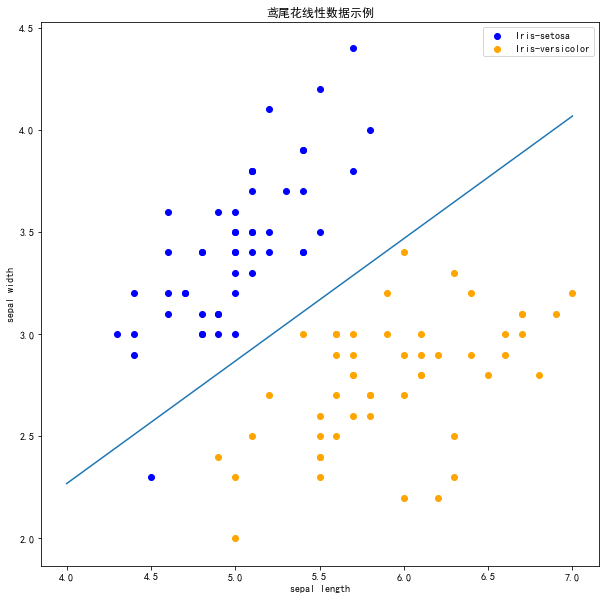

In [42]:
plt.figure(figsize = (10,10))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50,0],data[:50,1],c='b',label = 'Iris-setosa')
plt.scatter(data[50:100,0],data[50:100,1],c='orange',label = 'Iris-versicolor')

x_points = np.arange(4, 8)
y_ = -(clf.coef_[0][0] * x_points + clf.intercept_)/ clf.coef_[0][1]
plt.plot(x_points, y_)

plt.legend()
plt.grid(False)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

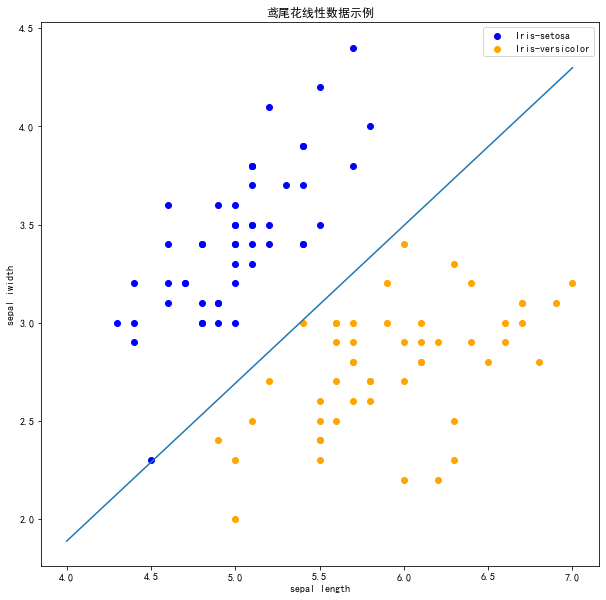

In [43]:
clf = Perceptron(fit_intercept = True, max_iter = 1000, tol = None, shuffle = True)
clf.fit(X,y)

plt.figure(figsize = (10,10))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('鸢尾花线性数据示例')

plt.scatter(data[:50,0],data[:50,1],c= 'b', label = 'Iris-setosa')
plt.scatter(data[50:100,0],data[50:100,1],c= 'orange', label= 'Iris-versicolor')

x_points = np.arange(4,8)
y_ = -(clf.coef_[0][0] * x_points + clf.intercept_)/ clf.coef_[0][1]
plt.plot(x_points,y_)

plt.legend()
plt.grid(False)
plt.xlabel('sepal length')
plt.ylabel('sepal iwidth')
plt.legend()